In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing

df = pd.read_csv('adult.data',header = None, sep=',',na_values=' ?').dropna()
print(df.head())
original_dataset=df

   0                  1       2           3   4                    5   \
0  39          State-gov   77516   Bachelors  13        Never-married   
1  50   Self-emp-not-inc   83311   Bachelors  13   Married-civ-spouse   
2  38            Private  215646     HS-grad   9             Divorced   
3  53            Private  234721        11th   7   Married-civ-spouse   
4  28            Private  338409   Bachelors  13   Married-civ-spouse   

                   6               7       8        9     10  11  12  \
0        Adm-clerical   Not-in-family   White     Male  2174   0  40   
1     Exec-managerial         Husband   White     Male     0   0  13   
2   Handlers-cleaners   Not-in-family   White     Male     0   0  40   
3   Handlers-cleaners         Husband   Black     Male     0   0  40   
4      Prof-specialty            Wife   Black   Female     0   0  40   

               13      14  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K  
3   United-State

In [2]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country','income']
df.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# 1th
df['sex'] = df['sex'].map({' Male': 1, ' Female': 0}).astype(int)
df['income'] = df['income'].map({' <=50K': 1, ' >50K': 0}).astype(int)

# 2th
df['education'] = df['education'].replace([' HS-grad', ' Masters'], 'Masters')
df['education'] = df['education'].replace(
    [' Some-college', ' Bachelors'], 'Bachelors')
df['education'] = df['education'].replace(
    [' 1st-4th', ' Preschool'], 'Nursery')  # 幼兒園
df['education'] = df['education'].replace(
    [' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th'], 'Elementary')  # 國小5-11


df['capital_gain'] = preprocessing.scale(df['capital_gain'])
df['capital_loss'] = preprocessing.scale(df['capital_loss'])

# 3th.. Best sore XGBoost rmse: 10.474239756651409
race_map = {' White': 0, ' Amer-Indian-Eskimo': 1,
            ' Asian-Pac-Islander': 2, ' Black': 3, ' Other': 4}
df['race'] = df['race'].map(race_map)


def f(x):
    if x['workclass'] == ' Federal-gov' or x['workclass'] == ' Local-gov' or x['workclass'] == ' State-gov':
        return 'govt'
    elif x['workclass'] == ' Private':
        return 'private'
    elif x['workclass'] == ' Self-emp-inc' or x['workclass'] == ' Self-emp-not-inc':
        return 'self_employed'
    else:
        return 'without_pay'


df['employment_type'] = df.apply(f, axis=1)
employment_map = {'govt': 0, 'private': 1,
                  'self_employed': 2, 'without_pay': 3}
df['employment_type'] = df['employment_type'].map(employment_map)

le = LabelEncoder()
for col in df[["workclass", "marital_status", "education", "relationship", "native_country", "occupation"]]:
    df[col] = le.fit_transform(df[col])


In [4]:
df.isnull().any()

age                False
workclass          False
fnlwgt             False
education          False
education_num      False
marital_status     False
occupation         False
relationship       False
race               False
sex                False
capital_gain       False
capital_loss       False
hours_per_week     False
native_country     False
income             False
employment_type    False
dtype: bool

In [5]:
df_test = df

# SVR

In [6]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

X = df_test.drop('hours_per_week', axis=1)
y = df_test['hours_per_week']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=5555)
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
regressor = SVR(kernel = 'rbf',)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

from sklearn.metrics import mean_squared_error ,mean_absolute_percentage_error,mean_absolute_error
rmse=mean_squared_error(y_test, y_pred,squared=False)
mape=mean_absolute_percentage_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)

print("rmse:",rmse)
print("mape:",mape)
print("mae:",mae)

rmse: 10.781279312604767
mape: 0.2644740564835341
mae: 6.695490832097049


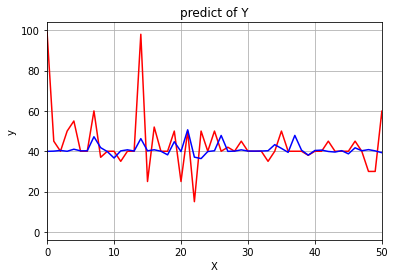

In [7]:
act_y = y_test.values
pre_y = y_pred
plt.plot(act_y, color='r')
plt.plot(pre_y, color="b")
plt.ylabel("y")
plt.xlabel("X")
plt.title("predict of Y")
plt.xlim([0, 50])
plt.grid(True)

plt.show()

In [8]:
age = []
x_test = sc.inverse_transform(X_test)
for data in x_test:
    age.append(data[0])

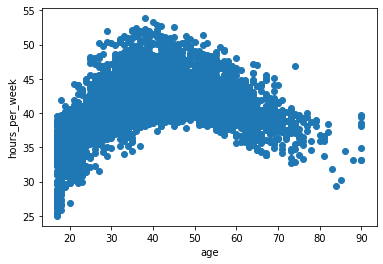

In [9]:
plt.clf()
plt.scatter(age, y_pred)
plt.xlabel('age')
plt.ylabel('hours_per_week')    
plt.show()

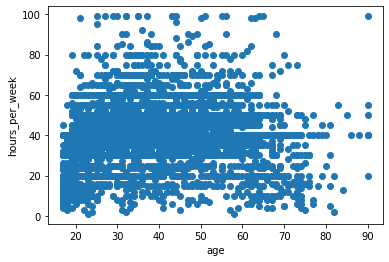

In [10]:
plt.clf()
plt.scatter(age, y_test)
plt.xlabel('age')
plt.ylabel('hours_per_week')    
plt.show()

# KNN

In [11]:
from sklearn.neighbors import KNeighborsRegressor


X = df_test.drop('hours_per_week', axis=1)
y = df_test['hours_per_week']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=5555)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

for i in range(50,300,50):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    from sklearn.metrics import mean_squared_error ,mean_absolute_percentage_error,mean_absolute_error

    rmse=mean_squared_error(y_test, y_pred,squared=False)
    mape=mean_absolute_percentage_error(y_test, y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    print("n_neighbors=",i)
    print("rmse:",rmse)
    print("mape:",mape)
    print("mae:",mae)

n_neighbors= 50
rmse: 10.460690006267622
mape: 0.26936810692972074
mae: 7.154713227980992
n_neighbors= 100
rmse: 10.503525244278162
mape: 0.27209845454215664
mae: 7.1689678417504705
n_neighbors= 150
rmse: 10.531477650719031
mape: 0.2734725571093078
mae: 7.184522046634986
n_neighbors= 200
rmse: 10.558414436519591
mape: 0.274898144775723
mae: 7.196446568681623
n_neighbors= 250
rmse: 10.584447923072087
mape: 0.27599506223125186
mae: 7.209863189302686


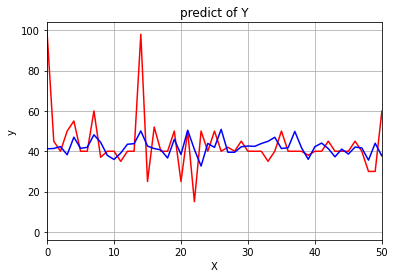

In [12]:
act_y = y_test.values
pre_y = y_pred

plt.plot(act_y, color='r')
plt.plot(pre_y, color="b")
plt.ylabel("y")
plt.xlabel("X")
plt.title("predict of Y")
plt.xlim([0, 50])
plt.grid(True)

plt.show()

In [13]:
age = []
x_test = sc.inverse_transform(X_test)
for data in x_test:
    age.append(data[0])

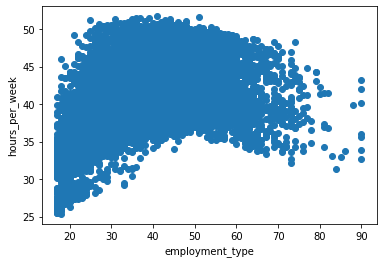

In [14]:
plt.clf()
plt.scatter(age, y_pred)
plt.xlabel('employment_type')
plt.ylabel('hours_per_week')    
plt.show()

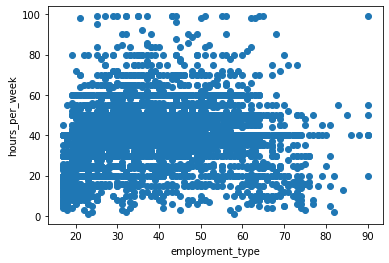

In [15]:
plt.clf()
plt.scatter(age, y_test)
plt.xlabel('employment_type')
plt.ylabel('hours_per_week')    
plt.show()

# RandomForest

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

X = df_test.drop('hours_per_week', axis=1)
y = df_test['hours_per_week']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=5555)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

rfc = RandomForestRegressor(n_estimators=100,  random_state=1113)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

from sklearn.metrics import mean_squared_error ,mean_absolute_percentage_error,mean_absolute_error

rmse=mean_squared_error(y_test, y_pred,squared=False)
mape=mean_absolute_percentage_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
print("rmse:",rmse)
print("mape:",mape)
print("mae:",mae)

rmse: 10.575286748122258
mape: 0.261386776210134
mae: 7.356626837658112


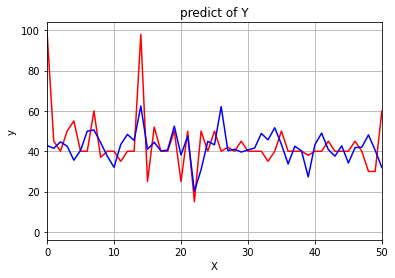

In [17]:
act_y = y_test.values
pre_y = y_pred

plt.plot(act_y, color='r')
plt.plot(pre_y, color="b")
plt.ylabel("y")
plt.xlabel("X")
plt.title("predict of Y")
plt.xlim([0, 50])
plt.grid(True)

plt.show()

In [18]:
age = []
x_test = sc.inverse_transform(X_test)
for data in x_test:
    age.append(data[0])

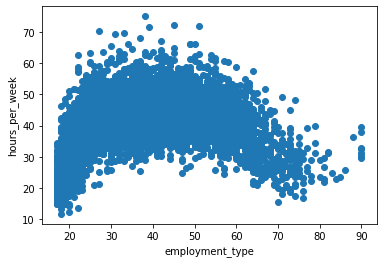

In [19]:
plt.clf()
plt.scatter(age, y_pred)
plt.xlabel('employment_type')
plt.ylabel('hours_per_week')    
plt.show()

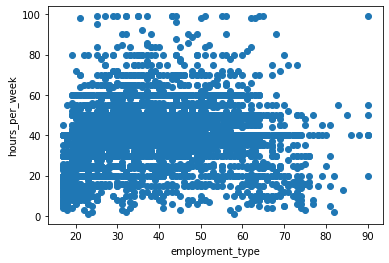

In [20]:
plt.clf()
plt.scatter(age, y_test)
plt.xlabel('employment_type')
plt.ylabel('hours_per_week')    
plt.show()

# XGBoost

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

X = df_test.drop('hours_per_week', axis=1)
y = df_test['hours_per_week']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5555)
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

xgbc = xgb.XGBRegressor()
xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_test)


rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("rmse:", rmse)
print("mape:", mape)
print("mae:", mae)

rmse: 10.3231313075185
mape: 0.2552348548721742
mae: 7.064749226594896


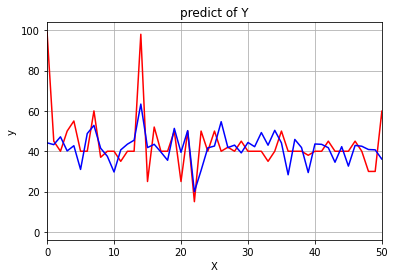

In [22]:
act_y = y_test.values
pre_y = y_pred

plt.plot(act_y, color='r')
plt.plot(pre_y, color="b")
plt.ylabel("y")
plt.xlabel("X")
plt.title("predict of Y")
plt.xlim([0, 50])
plt.grid(True)

plt.show()

In [23]:
age = []
x_test = sc.inverse_transform(X_test)
for data in x_test:
    age.append(data[0])

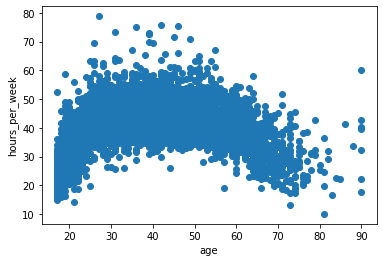

In [24]:
plt.clf()
plt.scatter(age, y_pred)
plt.xlabel('age')
plt.ylabel('hours_per_week')    
plt.show()

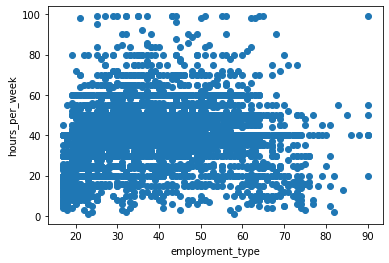

In [25]:
plt.clf()
plt.scatter(age, y_test)
plt.xlabel('employment_type')
plt.ylabel('hours_per_week')    
plt.show()